In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

# Defining the data as a list of lists
data = [
    ['Height', 'Weight', 'Age', 'Grip strength', 'Frailty'],
    [65.8, 112, 30, 30, 'N'],
    [71.5, 136, 19, 31, 'N'],
    [69.4, 153, 45, 29, 'N'],
    [68.2, 142, 22, 28, 'Y'],
    [67.8, 144, 29, 24, 'Y'],
    [68.7, 123, 50, 26, 'N'],
    [69.8, 141, 51, 22, 'Y'],
    [70.1, 136, 23, 20, 'Y'],
    [67.9, 112, 17, 19, 'N'],
    [66.8, 120, 39, 31, 'N']
]

# Defining the CSV file path
csv_file_path = '/content/drive/MyDrive/raw_data_1.1.csv'

# Creating and writing the data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(data)

print(f"CSV file '{csv_file_path}' created successfully.")


CSV file '/content/drive/MyDrive/raw_data_1.1.csv' created successfully.


In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/raw_data_1.1.csv',encoding= 'unicode_escape')

In [ ]:
data.isnull().sum()

Height (Inches)     0
Weight (Pounds)     0
Age                 0
Grip strength       0
Frailty             0
dtype: int64

there are no null values

In [ ]:
data.set_axis(['Height', 'Weight', 'Age','Grip','Frailty'], axis='columns')
print(data)

  Height (Inches)  Weight (Pounds)  Age  Grip strength  Frailty 
0            65.8              112   30             30        N 
1            71.5              136   19             31        N 
2            69.4              153   45             29        N 
3            68.2              142   22             28        Y 
4            67.8              144   29             24        Y 
5            68.7              123   50             26        N 
6            69.8              141   51             22        Y 
7            70.1              136   23             20        Y 
8            67.9              112   17             19        N 
9            66.8              120   39             31        N 


In [ ]:
import pandas as pd

# Loading the data from the CSV file

data = pd.read_csv('/content/drive/MyDrive/raw_data_1.1.csv', encoding='unicode_escape')

# Data Cleaning and Modification Steps

# 1. Convert 'Y' to 1 and 'N' to 0 in the 'Frailty' column
data['Frailty'] = data['Frailty'].apply(lambda x: 1 if x == 'Y' else 0)

# Saving the cleaned and modified data to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)

# Printing the cleaned and modified data
print(data)


   Height  Weight  Age  Grip strength  Frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70.1     136   23             20        1
8    67.9     112   17             19        0
9    66.8     120   39             31        0


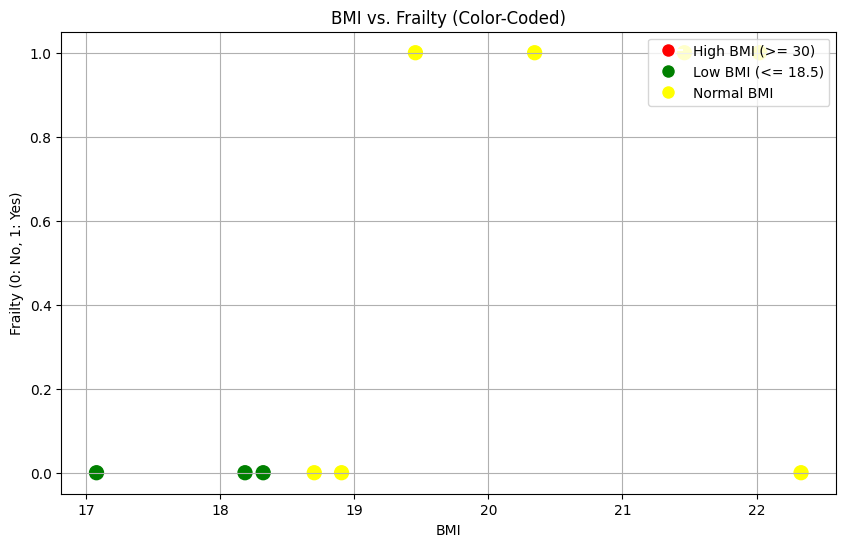

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculating BMI (assuming height is in inches and weight is in pounds)
data['BMI'] = (data['Weight'] / (data['Height'] * data['Height'])) * 703

# Defining BMI threshold values for color coding
high_bmi_threshold = 30
low_bmi_threshold = 18.5

# Creating a list of colors based on BMI values
colors = []
for bmi in data['BMI']:
    if bmi >= high_bmi_threshold:
        colors.append('red')  # High BMI (>= 30)
    elif bmi <= low_bmi_threshold:
        colors.append('green')  # Low BMI (<= 18.5)
    else:
        colors.append('yellow')  # Normal BMI

# Plotting BMI vs. Frailty with color-coded dots
plt.figure(figsize=(10, 6))
plt.scatter(data['BMI'], data['Frailty'], c=colors, marker='o', s=100)
plt.title('BMI vs. Frailty (Color-Coded)')
plt.xlabel('BMI')
plt.ylabel('Frailty (0: No, 1: Yes)')
plt.grid(True)

# Adding a legend for color coding
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='High BMI (>= 30)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Low BMI (<= 18.5)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Normal BMI')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()


it can be found that majority of Frailty cases were observed in the Normal BMI making it hard to detect early.

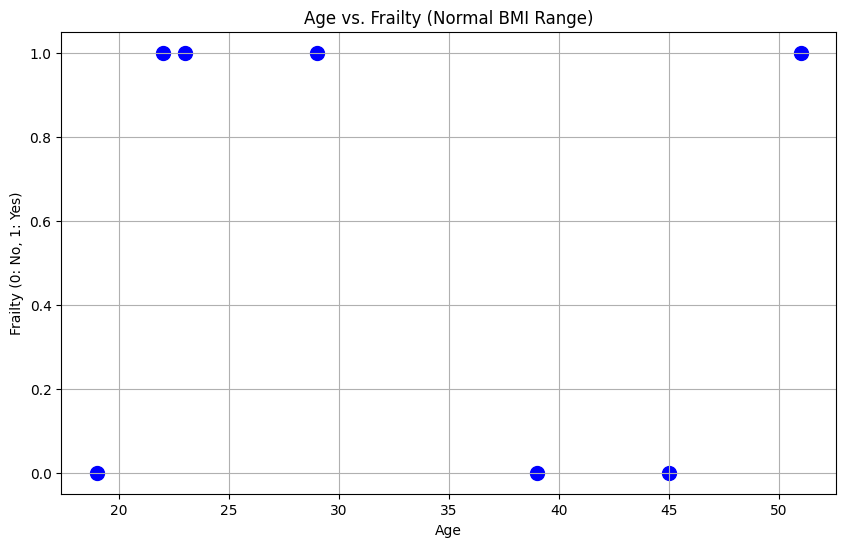

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculating BMI (height is in inches and weight is in pounds)
data['BMI'] = (data['Weight'] / (data['Height'] * data['Height'])) * 703

# Defining BMI threshold values
low_bmi_threshold = 18.5
high_bmi_threshold = 30

# Filtering data for individuals with normal BMI
normal_bmi_data = data[(data['BMI'] > low_bmi_threshold) & (data['BMI'] < high_bmi_threshold)]

# Creating a plot of age vs. frailty within the normal BMI range
plt.figure(figsize=(10, 6))
plt.scatter(normal_bmi_data['Age'], normal_bmi_data['Frailty'], color='blue', marker='o', s=100)
plt.title('Age vs. Frailty (Normal BMI Range)')
plt.xlabel('Age')
plt.ylabel('Frailty (0: No, 1: Yes)')
plt.grid(True)

plt.show()


by this visualisation we can observe that majority of Frailty cases even when BMI is normal are found at early ages below 35.